In [1]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import graph_generator
from common import CityResult,CentroidResult
from file_name_generator import generate_new_name


In [2]:
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rcParams.update({'font.size': 30})
# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = False

Загрузка данных

In [16]:
mypath = './clusters_results/2024_07_26'

In [17]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r : dict[str:CityResult]= {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

In [8]:
# names = {}
# for n in r:
#     print(r)
#     q = n.split('_')[1].split('.')[0]
#     names[q] = q
# print(names)

{'R1312868.pkl': <common.CityResult object at 0x7facdd1851b0>, 'R2758781.pkl': <common.CityResult object at 0x7fad340ac3a0>, 'R2999176.pkl': <common.CityResult object at 0x7facdcd7fac0>, 'R182887.pkl': <common.CityResult object at 0x7facdcd7dde0>, 'R1390623.pkl': <common.CityResult object at 0x7facdcd7e830>, 'R963764.pkl': <common.CityResult object at 0x7facdcd969e0>, 'R1735835.pkl': <common.CityResult object at 0x7facdcd97700>, 'R175031.pkl': <common.CityResult object at 0x7facdcd95480>, 'R184985.pkl': <common.CityResult object at 0x7facdcd95c30>, 'R180114.pkl': <common.CityResult object at 0x7facdcd962c0>, 'R1282148.pkl': <common.CityResult object at 0x7facdcd95ab0>, 'R3540206.pkl': <common.CityResult object at 0x7facdce4b040>, 'R132206.pkl': <common.CityResult object at 0x7facdce4b880>, 'R175481.pkl': <common.CityResult object at 0x7facdce4ba60>, 'R2521434.pkl': <common.CityResult object at 0x7facdce48df0>, 'R3030295.pkl': <common.CityResult object at 0x7facdce49840>, 'R194124.pkl':

IndexError: list index out of range

In [12]:
# mypath = '../for_paper/data/not_my'

In [13]:
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# 
# r : dict[str:CityResult]= {}
# for name in onlyfiles:
#     with open(join(mypath, name), 'rb') as f:
#         r[name] = pickle.load(f)
#         f.close()

In [14]:
mypath = '../for_paper/data/data/data_csv'

In [15]:
# import networkx as nx
# from tqdm import tqdm
# import csv
# import osmnx as ox
# 
# 
# def get_graph(city_id: str = 'R2555133') -> nx.Graph:
#     gdf = ox.geocode_to_gdf(city_id, by_osmid=True)
#     polygon_boundary = gdf.unary_union
#     graph = ox.graph_from_polygon(polygon_boundary,
#                                   network_type='drive',
#                                   simplify=True)
#     G = nx.Graph(graph)
#     H = nx.Graph()
#     # Добавляем рёбра в новый граф, копируя только веса
#     for u, d in G.nodes(data=True):
#         H.add_node(u, x=d['x'], y=d['y'])
#     for u, v, d in G.edges(data=True):
#         H.add_edge(u, v, length=d['length'])
#     del city_id, gdf, polygon_boundary, graph, G
#     return H
# 
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# for name in tqdm(onlyfiles):
#     if 'mistakes_' in name:
#         continue
#     with open(join(mypath, name), 'r') as f:
#         csv_reader = csv.DictReader(f)
#         data = [row for row in csv_reader]
#         id = name.split('_')[1].split('.')[0]
#         nn = 'graph_' + id +'.graphml'
#         G = nx.read_graphml('../for_paper/data/data/data_graphs/'+nn)
#         r = CityResult(name, '',name, len(G.nodes), len(G.edges))
#         # print(name,data,)
#         for d in data:
#             cr = CentroidResult(1, 2,2,float(d['ks']))
#             cr.speed_up.append(float(d['dijkstra_time'])/float(d['times']))    
#             r.points_results.append(cr)
#         r.save()

Обработка данных

In [8]:
USE_OPT_CONST = True # использовать ли фиттинг С0 для каждого города

In [17]:
print(len(r))

630


In [6]:
rr = {'PARIS.pkl': r['PARIS.pkl']}
r = rr

In [9]:
from tqdm import tqdm
import networkx as nx
import csv

nodes = []
alpha_max = []
speed_up = []
err = []
NODES= []
c = []
k = 0
for i,name in tqdm(enumerate(r),total = len(r)):
    # print(name)
    res:CityResult = r[name]
    print(name)
    print(res.nodes, res.id)
    N= res.nodes
    

    
    
    # alpha_max.append(max(p.speed_up[0] for p in res.points_results))
    # print(res.points_results[0].errors)
    k+=1
    X = [p.alpha for p in res.points_results]
    A = np.array([p.speed_up[0] for p in res.points_results])
    E = np.array([np.mean(p.errors) for p in res.points_results])
    
    
    NODES.append(res.nodes)
    # for p in tqdm(res.points_results):
    #     r = p.resolution
    #     communities = graph_generator.resolve_communities(G, r)
    #     
    #     m.append(nx.community.modularity(G, communities, resolution=r))
    #     m_1.append(nx.community.modularity(G, communities))
    #     m_w.append(nx.community.modularity(G, communities,weight='length', resolution=r))
    #     m_w_1.append(nx.community.modularity(G, communities, weight='length',))
    #     
    # 
    # fig, axs = plt.subplots(2, 2)
    # fig.set_figwidth(30)
    # fig.set_figheight(30)
    # 
    # axs[0][0].scatter(m, E, label = 'm')
    # axs[0][0].legend()
    # 
    # axs[0][1].scatter(m_1, E, label = 'm1')
    # axs[0][1].legend()
    # 
    # axs[1][0].scatter(m_w, E, label = 'mw')
    # axs[1][0].legend()
    # 
    # axs[1][1].scatter(m_w_1, E, label = 'mw1')
    # axs[1][1].legend()
        # id = name.split('_')[1].split('.')[0]
        # nn = 'graph_' + id +'.graphml'
#         G = nx.read_graphml('../for_paper/data/data/data_graphs/'+nn)
#         r = CityResult(name, '',name, len(G.nodes), len(G.edges))
#         # print(name,data,)
#         for d in data:
#             cr = CentroidResult(1, 2,2,float(d['ks']))
#             cr.speed_up.append(float(d['dijkstra_time'])/float(d['times']))    
#             r.points_results.append(cr)
    
    # 
    # print(X)
    # axs[1].errorbar(X, E, fmt='o', label = "{}: {}".format(name, r[name].nodes))
    # axs[1].set(xlabel='alpha', ylabel='Err')
    # axs[1].legend()
    # 
    # alpha = np.argmax(A)
    # # alpha_max.append(X[alpha])
    # nodes.append(res.nodes)
    def ax(x,c0 = 2):
        # c0 = -0.48 * np.log(N) + 6
        b1 =2
        b0 = res.edges/res.nodes
        k = c0/np.sqrt(x*N)*(1 - np.log(x)/np.log(N)) + b1/b0 * x * (1 + np.log(x)/np.log(N)) +1/(np.sqrt(x*N)) * (b0+1)/b0/np.log(N)
        return 1/k
    if USE_OPT_CONST:
        # Xx = np.array(X)
        # Aa = np.array(A)
        # idx = np.argwhere(Xx < 0.2)
        # idx.resize(len(idx))
        # Xx = Xx[idx]
        # Aa = Aa[idx]
        popt = curve_fit(ax, X, A, p0 = [2])
        x = np.linspace(1/N,1,5000)
        y = ax(x, *popt[0])
        c.append(popt[0][0])
        dd = popt[0][0]/ np.sqrt(popt[1][0][0])
        print(popt[0][0], np.sqrt(popt[1][0][0]),N)
        # print(*popt[0])
        speed_up.append(max(y))
        alpha_max.append(x[np.argmax(y)])
    else:
        x = np.linspace(1/N,1,5000)
        y = ax(x)
    # 
    # 
    # # axs[0].errorbar(x, y, color="black",linewidth=4)
    # # print(i)
    # if dd < 2:
    #     print(name, dd)
    #     fig, axs = plt.subplots(1, 1)
    #     # fig.rc('legend', fontsize=8)    # legend fontsize
    #     # fig.rcParams.update({'font.size': 20})
    #     fig.set_figwidth(25)
    #     fig.set_figheight(15)
    #     axs=[axs]
    #     if name!='output_R1390623.csv.pkl':
    #         axs[0].errorbar(x, y,linewidth=8,alpha=0.2)
    # 
    #     axs[0].scatter(X, A, label = "{}: {}".format(name, r[name].nodes), s = 40)
    #     axs[0].set(xlabel='alpha', ylabel='Acceleration')
    #     # axs = [axs]
    #     # axs[0].legend()
    # # print(X)
    # # print(A)
    

100%|██████████| 1/1 [00:00<00:00, 243.37it/s]

PARIS.pkl
9491 R71525
0.8930356228008587 0.1152404340532056 9491


In [0]:
for i in range(len(err)):
    err[i] = float(err[i])

In [26]:
print(len(alpha_max))

330


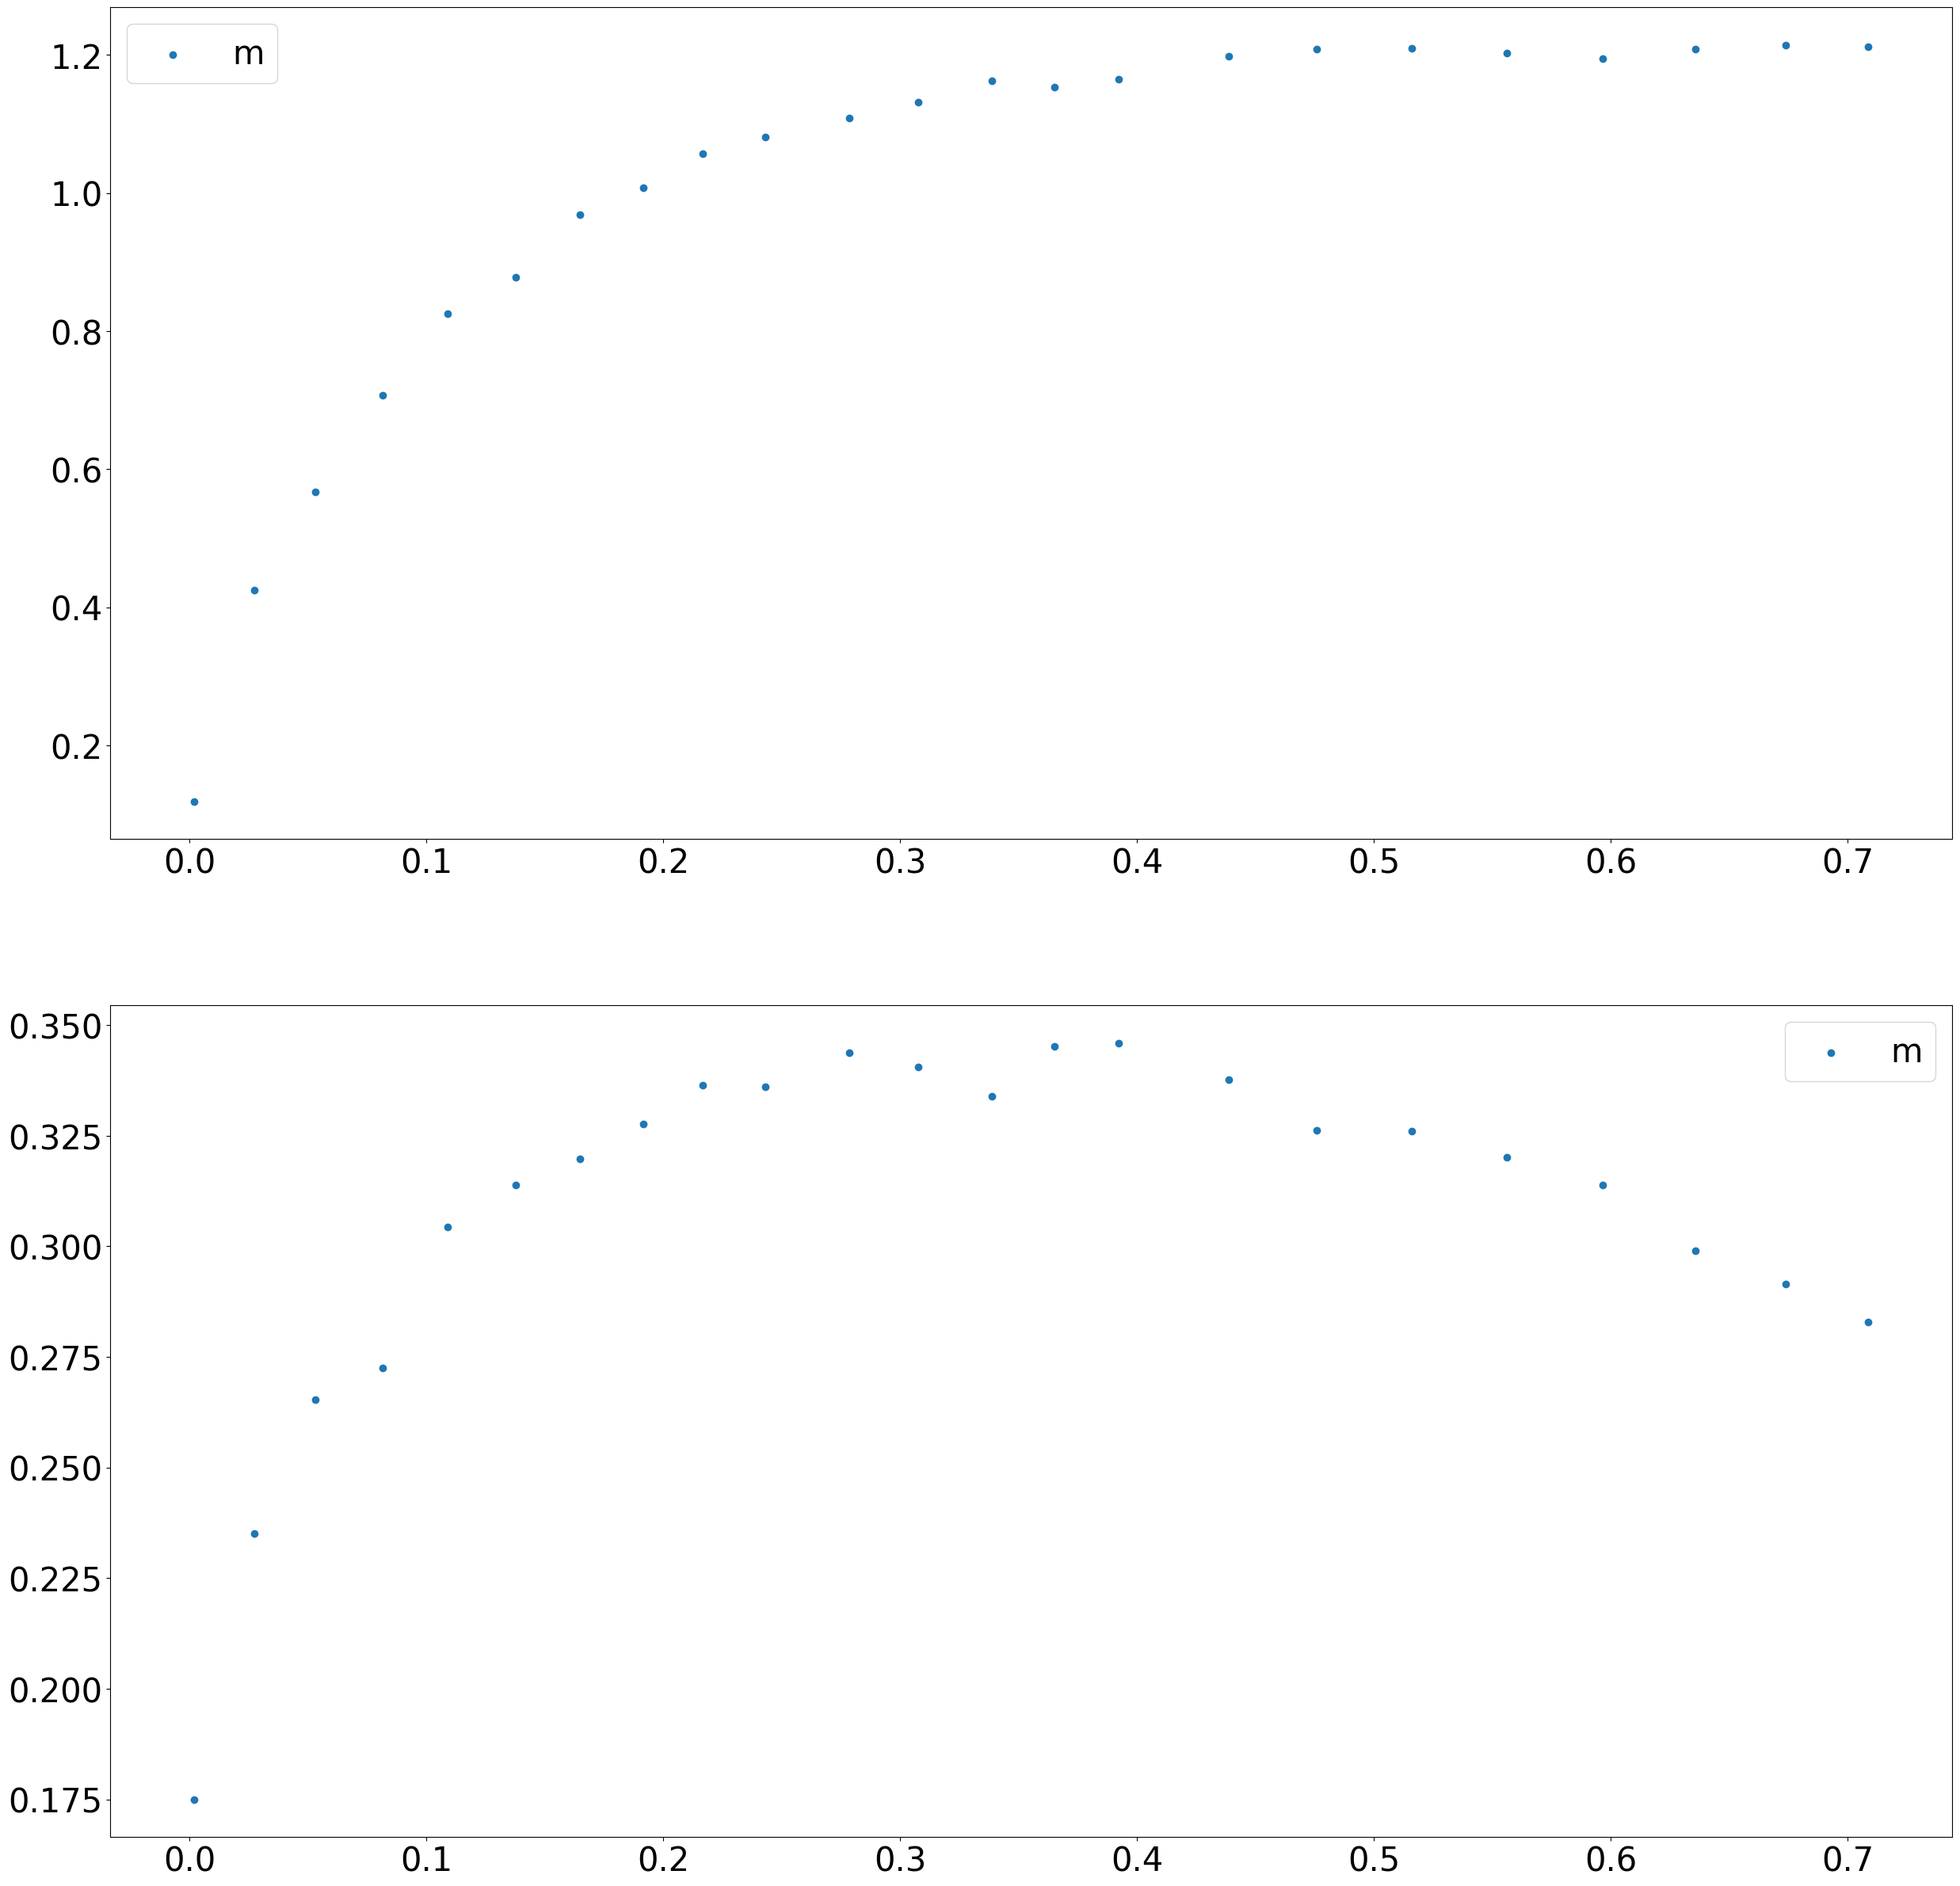

In [18]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(30)
fig.set_figheight(30)
res: CityResult = r['PARIS.pkl']

axs[0].scatter([p.alpha for p in res.points_results], [p.speed_up for p in res.points_results], label = 'm')
axs[0].legend()

axs[1].scatter([p.alpha for p in res.points_results], [np.mean(p.errors) for p in res.points_results], label = 'm')
axs[1].legend()

In [0]:
print(len(G.nodes))

In [0]:
print(type(err))

In [0]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

NODES = np.array(NODES)
speed_up = np.array(speed_up)
err = np.array(err)

idx = np.argsort(NODES)

NODES = NODES[idx]
speed_up = speed_up[idx]
err = err[idx]

# idx = np.argwhere(NODES > 10000)


def func(x):
    return 1/2 * (x/4)**(1/3)

xx = np.linspace(min(NODES), max(NODES),1000)
yy = func(xx)
# NODES = NODES[idx]
# speed_up = speed_up[idx]
# err = err[idx]

axs.scatter(NODES,speed_up,s = 13,alpha=1,marker='o',linewidth=4,)
axs.plot(xx,yy, color = 'red', linewidth=3.0)
axs.set(xlabel='NODES', ylabel='Acceleration')
axs.set_xscale('log')
# axs2 = axs.twinx() 
# axs2.scatter(NODES,err, s = 13,alpha=0.5,zorder=100,marker='o',linewidth=4, c ='r')
# axs2.set(ylabel='ERROR')
# axs2.yaxis.label.set_color('red')


In [0]:
print('speed_up',np.mean(speed_up))
print('err',np.mean(err))

In [0]:
nodes = []
alpha_max = []
c = []
k = 0
for i,name in enumerate(r):

    res:CityResult = r[name]
    N= res.nodes

    alpha_max.append(max(p.speed_up[0] for p in res.points_results))

    k+=1
    X = [p.alpha for p in res.points_results]
    A = [p.speed_up[0] for p in res.points_results]
    E = [np.mean(p.errors) for p in res.points_results]

    print(X)
    axs[1].errorbar(X, E, fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[1].set(xlabel='alpha', ylabel='Err')
    axs[1].legend()

    alpha = np.argmax(A)
    # alpha_max.append(X[alpha])
    nodes.append(res.nodes)
    def ax(x,c0 = 2):
        # c0 = -0.48 * np.log(N) + 6
        b1 =2
        b0 = res.edges/res.nodes
        k = c0/np.sqrt(x*N)*(1 - np.log(x)/np.log(N)) + b1/b0 * x * (1 + np.log(x)/np.log(N)) +1/(np.sqrt(x*N)) * (b0+1)/b0/np.log(N)
        return 1/k
    if USE_OPT_CONST:
        # Xx = np.array(X)
        # Aa = np.array(A)
        # idx = np.argwhere(Xx < 0.2)
        # idx.resize(len(idx))
        # Xx = Xx[idx]
        # Aa = Aa[idx]
        popt = curve_fit(ax, X, A, p0 = [2])
        x = np.linspace(1/N,1,5000)
        y = ax(x, *popt[0])
        c.append(popt[0][0])
        dd = popt[0][0]/ np.sqrt(popt[1][0][0])
        print(popt[0][0], np.sqrt(popt[1][0][0]),N)
        # print(*popt[0])
    else:
        x = np.linspace(1/N,1,5000)
        y = ax(x)


    # axs[0].errorbar(x, y, color="black",linewidth=4)
    # print(i)
    if dd < 2:
        print(name, dd)
        fig, axs = plt.subplots(1, 1)
        # fig.rc('legend', fontsize=8)    # legend fontsize
        # fig.rcParams.update({'font.size': 20})
        fig.set_figwidth(25)
        fig.set_figheight(15)
        axs=[axs]
        if name!='output_R1390623.csv.pkl':
            axs[0].errorbar(x, y,linewidth=8,alpha=0.2)

        axs[0].scatter(X, A, label = "{}: {}".format(name, r[name].nodes), s = 40)
        axs[0].set(xlabel='alpha', ylabel='Acceleration')
        # axs = [axs]
        # axs[0].legend()
    # print(X)
    # print(A)


[0.06712162]


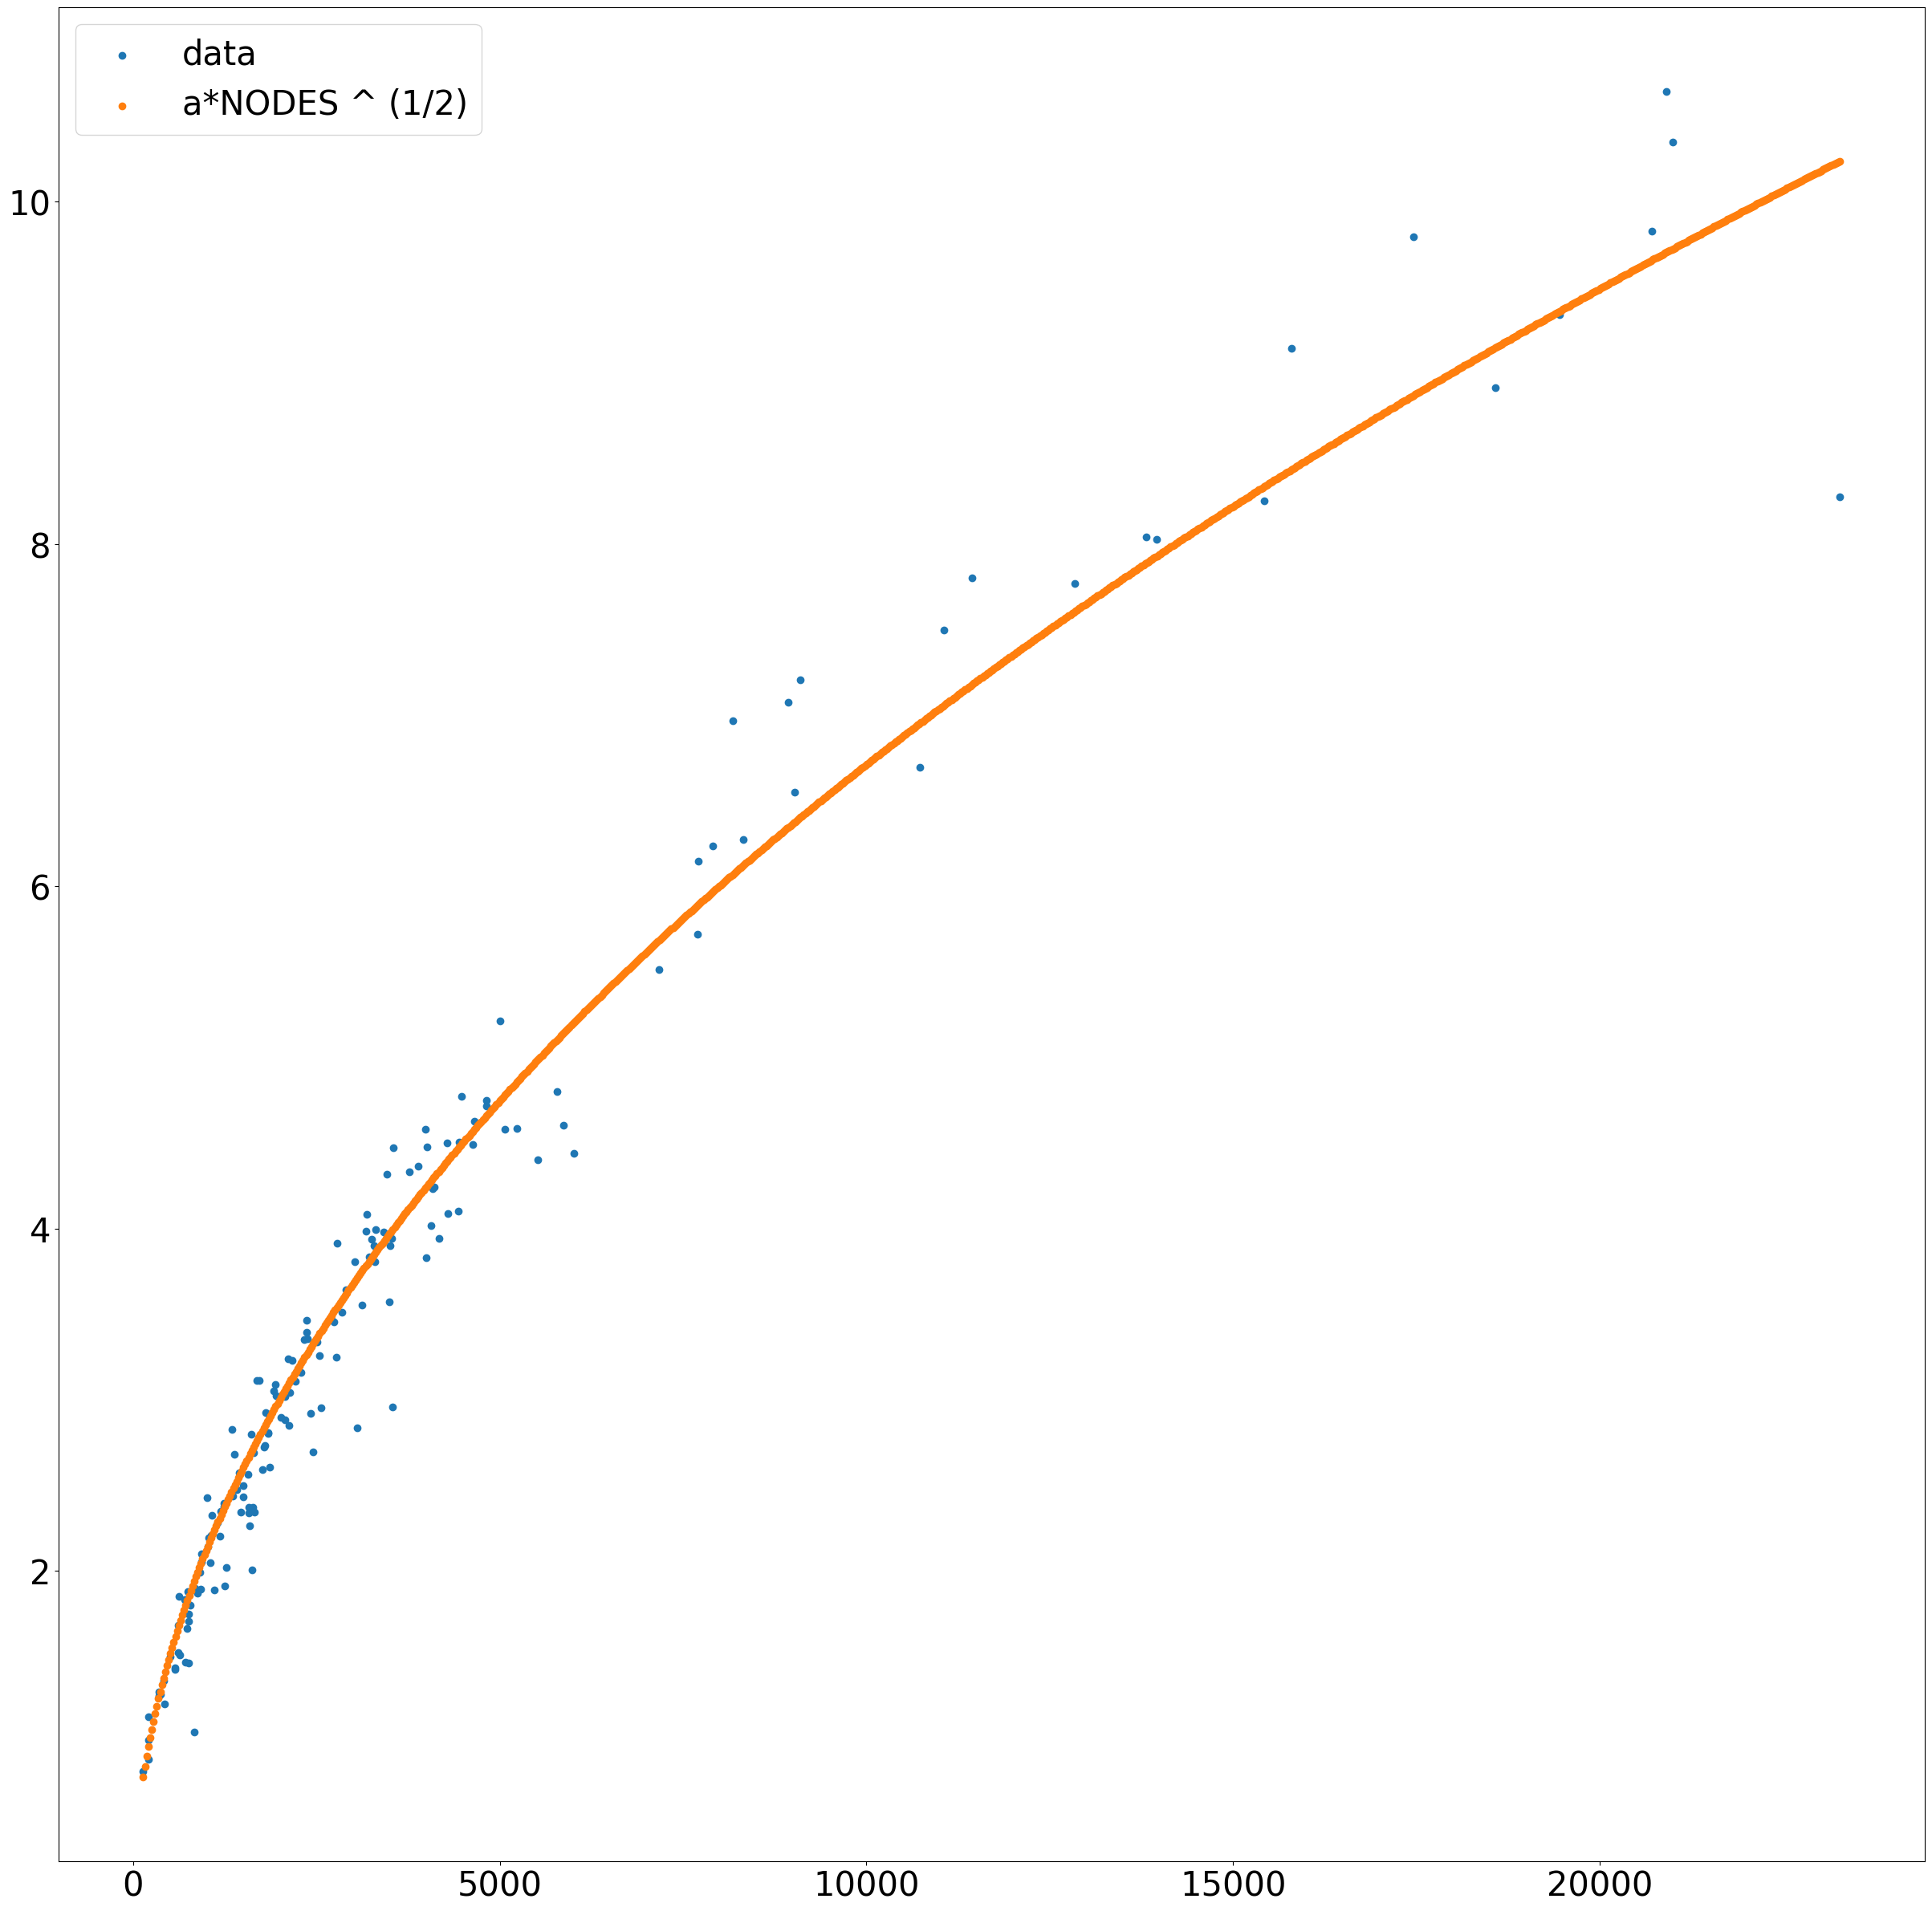

In [33]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(30)
fig.set_figheight(30)

def f (x,a):
    return a*x**(1/2)

popt = curve_fit(f,NODES, speed_up)
print(popt[0])

axs.scatter(NODES, speed_up, label = 'data')
xx = np.linspace(min(NODES),max(NODES),1000)
axs.scatter(xx, f(xx,*popt[0]), label = 'a*NODES ^ (1/2)')

axs.legend()
    

In [0]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)
def f(x):
    return 4 ** (1/3) * x ** (1/3)/3 - 3
x = np.linspace(min(nodes), max(nodes), 1000)
y = f(x)
axs.errorbar(x, y, fmt='o', label = "{}: {}".format(name, r[name].nodes))
# axs.errorbar(nodes, alpha_max, fmt='o', label = "{}: {}".format(name, r[name].nodes))


axs.set(xlabel='alpha', ylabel='A')
# axs.legend()
axs.errorbar(nodes, alpha_max, fmt='o', label = "{}: {}".format(name, r[name].nodes))

In [0]:
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(10)

axs.set(xlabel='log(N)', ylabel='C0')
# axs.legend()
# 
def f(x,a,b):
    return a*x+b
        
# x = np.linspace(np.log(min(nodes)), np.log(max(nodes)), 1000)
# y = f(x)

# axs.errorbar(x,y)
indx = np.argsort(nodes)
n = np.array(nodes)[indx]
n = np.log(n)
cc = np.array(c)[indx]
# cc[6]-=0.25
axs.errorbar(n, cc, fmt='o')
# axs.errorbar(nodes, /alpha_max, fmt='o', label = "{}: {}".format(name, r[name].nodes))
popt = curve_fit(f, n, cc, p0 = [-1,1])
print(popt[0])
x = np.linspace(np.log(min(nodes)), np.log(max(nodes)), 1000)
y = f(x,*popt[0])
# 
axs.errorbar(x,y)


Графики:

Построим график ускорения от плотности

Уберем последние 4 точки